# HEALTH INSURANCE CLAIMS PREDICTION

# Section-1 : Exploratory Data Analysis (EDA)

In [291]:
#Importing necessary Libraries & Packages.
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [292]:
# Importing the dataset.
data_complete = pd.read_csv("C:/Users/rahul/Desktop/CapstoneFinal/insurance_data.csv")

In [293]:
# Describing the data.
data_complete.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,3009,0,yes,southwest,16884.92400,1
1,18,male,33.770,3008,1,no,southeast,1725.55230,1
2,28,male,33.000,3009,3,no,southeast,4449.46200,0
3,33,male,22.705,10009,0,no,northwest,21984.47061,0
4,32,male,28.880,8010,0,no,northwest,3866.85520,1


In [294]:
# Describing the data.
data_complete.tail()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
1333,50,male,30.97,4008,3,no,northwest,10600.5483,0
1334,18,female,31.92,3003,0,no,northeast,2205.9808,1
1335,18,female,36.85,3008,0,no,southeast,1629.8335,1
1336,21,female,25.80,8009,0,no,southwest,2007.9450,0
1337,61,female,29.07,8008,0,yes,northwest,29141.3603,1


In [295]:
# Describing the dimension of the data.
data_complete.shape

(1338, 9)

In [296]:
print("\nNumber of Rows available in the dataset : ",data_complete.shape[0])
print("\nNumber of Columns available in the dataset : ",data_complete.shape[1])


Number of Rows available in the dataset :  1338

Number of Columns available in the dataset :  9


In [297]:
# Evaluating a concise summary of the DataFrame containing the data.
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   object 
 6   region          1338 non-null   object 
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 94.2+ KB


In [298]:
# Checking to see if there is any NULL data.
data_complete.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [299]:
# Computing and displaying the summary statistics of the DataFrame containing the data.
data_complete.describe(include='all')

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338,1338.000000,1338.000000,1338.000000,1338,1338,1338.000000,1338.000000
unique,NaN,2,NaN,NaN,NaN,2,4,NaN,NaN
top,NaN,male,NaN,NaN,NaN,no,southeast,NaN,NaN
freq,NaN,676,NaN,NaN,NaN,1064,364,NaN,NaN
mean,39.207025,NaN,30.663397,5328.623318,1.094918,NaN,NaN,13270.422265,0.585202
std,14.049960,NaN,6.098187,2453.643236,1.205493,NaN,NaN,12110.011237,0.492871
min,18.000000,NaN,15.960000,3000.000000,0.000000,NaN,NaN,1121.873900,0.000000
25%,27.000000,NaN,26.296250,3008.000000,0.000000,NaN,NaN,4740.287150,0.000000
50%,39.000000,NaN,30.400000,4007.000000,1.000000,NaN,NaN,9382.033000,1.000000
75%,51.000000,NaN,34.693750,8004.000000,2.000000,NaN,NaN,16639.912515,1.000000


In [300]:
# Converting the categorical data into numerical data and/or dummy variables.
data_complete['sex'].unique()
data_complete['sex']=data_complete['sex'].map({'female':0,'male':1})
data_complete['smoker']=data_complete['smoker'].map({'yes':1,'no':0})
data_complete['region']=data_complete['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [301]:
# Creating a copy of the DataFrame to be used in Model Builiding.
data = data_complete
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,1,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,3,21984.47061,0
4,32,1,28.880,8010,0,0,3,3866.85520,1


<AxesSubplot:>

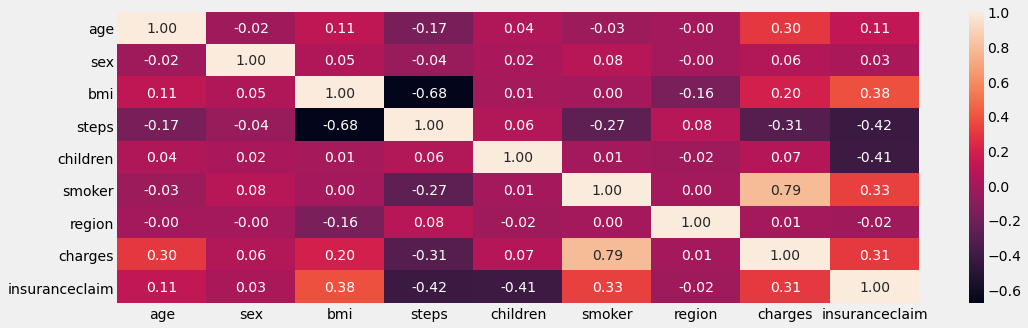

In [302]:
# Plotting a Heatmap to infer the correlation amongst the various attributes.
sns.heatmap(data.corr(),annot=True , fmt= ".2f")

In [303]:
data.shape

(1338, 9)

# Section-2 : Data Visualization

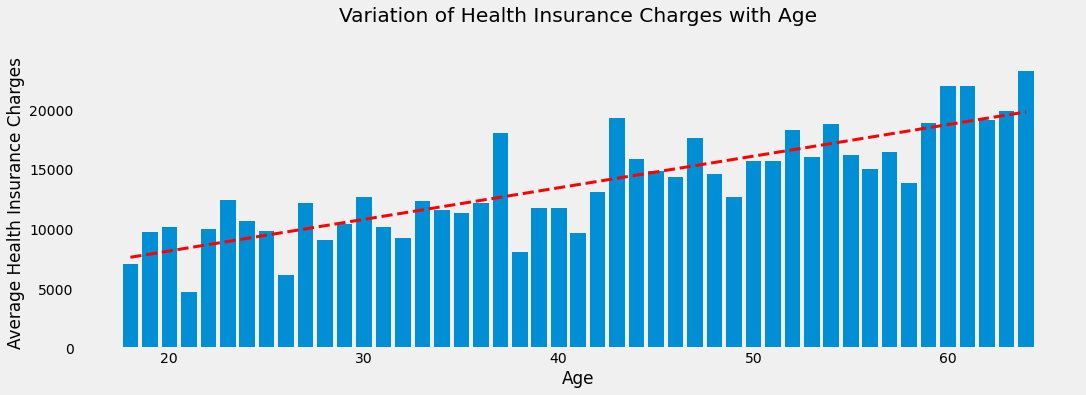

In [304]:
#Plotting Variation of Health Insurance Charges with Age.
import numpy as np
import matplotlib.pyplot as plt

data_viz = data.groupby('age').mean()
plt.bar(data_viz.index, data_viz['charges'])
plt.xlabel('Age')
plt.ylabel('Average Health Insurance Charges')
plt.title("Variation of Health Insurance Charges with Age", y=1.1)
#calculate equation for trendline
z = np.polyfit(data_viz.index, data_viz['charges'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(data_viz.index, p(data_viz.index), color="red", linewidth=3, linestyle="--")
plt.grid()
plt.show()

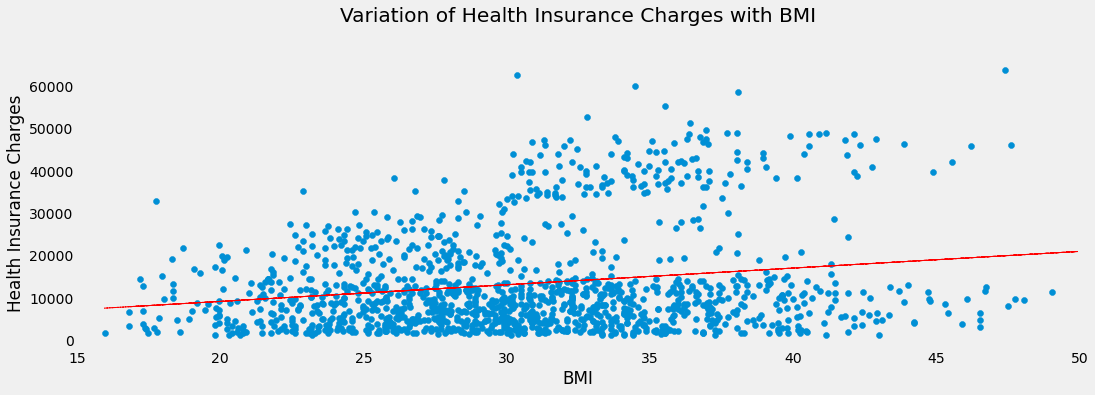

In [305]:
#Plotting Variation of Health Insurance Charges with BMI.
plt.xlabel('BMI')
plt.ylabel('Health Insurance Charges')
plt.title("Variation of Health Insurance Charges with BMI", y=1.1)
plt.scatter(data['bmi'], data['charges'])
plt.grid()
plt.xlim([15,50])

#plt.scatter(x, y, c ="blue")
z = np.polyfit(data['bmi'], data['charges'], 1)
p = np.poly1d(z)
plt.plot(data['bmi'],p(data['bmi']),color="red", linewidth=1, linestyle="--")

plt.show()

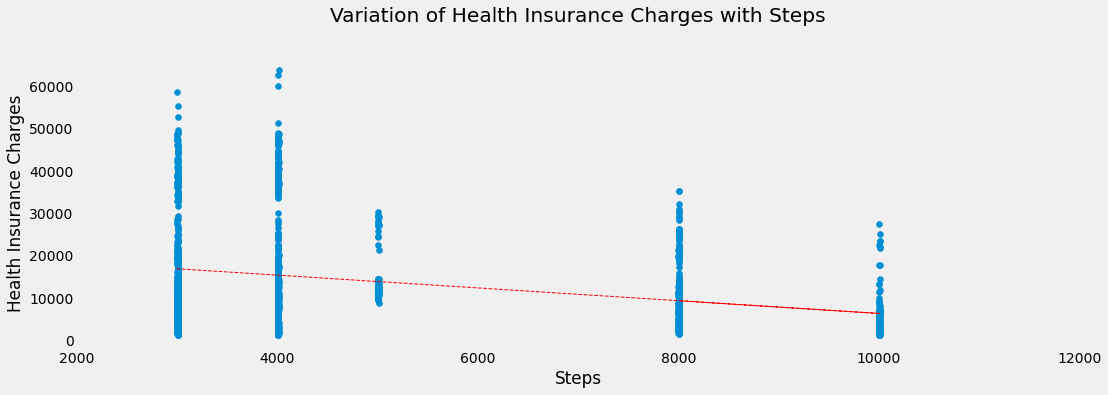

In [306]:
#Plotting Variation of Health Insurance Charges with Steps.
plt.xlabel('Steps')
plt.ylabel('Health Insurance Charges')
plt.title("Variation of Health Insurance Charges with Steps", y=1.1)
plt.scatter(data['steps'], data['charges'])
plt.grid()
plt.xlim([2000,12000])

#plt.scatter(x, y, c ="blue")
z = np.polyfit(data['steps'], data['charges'], 1)
p = np.poly1d(z)
plt.plot(data['steps'],p(data['steps']),color="red", linewidth=1, linestyle="--")

plt.show()

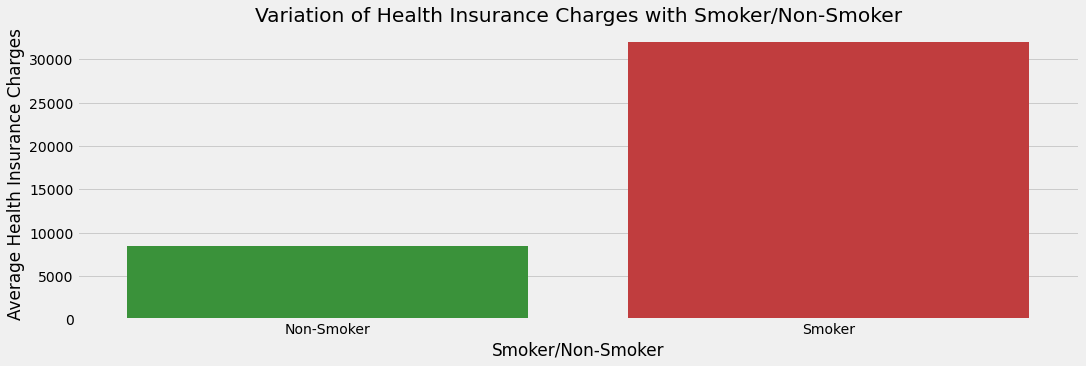

In [307]:
#Plotting Variation of Health Insurance Charges with Smoker/Non-Smoker.
fig = sns.barplot(x = data.smoker, y = data.charges, palette = ['tab:green', 'tab:red'], ci = None)
fig.set_xticklabels(["Non-Smoker","Smoker"])
plt.xlabel("Smoker/Non-Smoker")
plt.ylabel("Average Health Insurance Charges")
plt.title("Variation of Health Insurance Charges with Smoker/Non-Smoker") # You can comment this line out if you don't need title
plt.show(fig)

# Section-3.a : Model Building (Health Insurance Charges Prediction)

# Partitioning the Data

In [308]:
# Set up the dependent and the independent variables by dropping the Target Variable from the data frame.

# The independent variables that are being used for model builiding are : 
# 1. age
# 2. bmi
# 3. steps
# 4. smoker_yes 

# The target variable is : charges

# X = Independent Variables/Feature Matrix
# y = Taget Variable/Response Vector

X = data.drop(['sex','children','region','charges','insuranceclaim'],axis=1)
y = data['charges']

#X = data.drop(['insuranceclaim'],axis=1) 
#y = data['insuranceclaim']

In [309]:
# Making a copy of the attribute truncated complete dataset.
data_trunc = X
data_trunc.head()

,age,bmi,steps,smoker
0,19,27.900,3009,1
1,18,33.770,3008,0
2,28,33.000,3009,0
3,33,22.705,10009,0
4,32,28.880,8010,0


In [310]:
X.head()

,age,bmi,steps,smoker
0,19,27.900,3009,1
1,18,33.770,3008,0
2,28,33.000,3009,0
3,33,22.705,10009,0
4,32,28.880,8010,0


In [311]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [312]:
# Splitting the data : X and y into Training Data and Test Data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# Having a glance at the shape of the Training Data and the Test Data.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 4)
(268, 4)
(1070,)
(268,)


# Model Implementation

#### 1. Linear Regression
#### 2. Random Forest
#### 3. Support Vector Machine
#### 4. XG Gradient Boost

In [313]:
# Impoting the necessary Libraries & Packages for Model Building.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Linear Regression

In [314]:
# Creating a Linear Regression object.
linear_reg = LinearRegression()

# Training the Linear Regression model using the Training Data.
linear_reg.fit(X_train,y_train)

# Evaluating the coefficients that the model has generated.
coeffs = pd.DataFrame(linear_reg.coef_, index=X.columns).transpose()
coeffs

,age,bmi,steps,smoker
0,270.142924,492.647522,0.706145,24852.517088


In [315]:
# Comparing the predicted values to the actual values on Test Data.
test_pred_lr = linear_reg.predict(X_test)
test_pred_lr_comparison = pd.DataFrame({"Predicted":test_pred_lr,"Actual":y_test})
test_pred_lr_comparison

,Predicted,Actual
559,3476.298040,1646.42970
1087,11779.596268,11353.22760
1020,13552.620748,8798.59300
460,12126.734908,10381.47870
802,2446.108955,2103.08000
...,...,...
682,33619.776971,40103.89000
629,36771.479628,42983.45850
893,37574.157345,44202.65360
807,3988.996266,2136.88225


In [316]:
# Comparing the predicted values to the actual values on Training Data.
train_pred_lr = linear_reg.predict(X_train)
train_pred_lr_comparison = pd.DataFrame({"Predicted":train_pred_lr,"Actual":y_train})
#train_pred_lr_comparison

In [317]:
# Evaluating the model for accuracy on Test Data.
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_test, test_pred_lr))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_test, test_pred_lr))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, test_pred_lr)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
r2_lr_test = format(linear_reg.score(X_test, y_test))
print("\nVariance Score for the Linear Regression Model : ",r2_lr_test)


Mean Absolute Error :  3989.4435786846025

Mean Squared Error :  34416850.95548388

Root Mean Squared Error :  5866.587675598472

Variance Score for the Linear Regression Model :  0.7694486636353987


In [318]:
# Evaluating the model for accuracy on Training Data to identify overfitting (if any.)
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_train, train_pred_lr))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_train, train_pred_lr))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_train, train_pred_lr)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
r2_lr_train = format(linear_reg.score(X_train, y_train))
print("\nVariance Score for the Linear Regression Model : ",r2_lr_train)


Mean Absolute Error :  4086.9889746852673

Mean Squared Error :  35800201.79507746

Root Mean Squared Error :  5983.32698380069

Variance Score for the Linear Regression Model :  0.7545391474616814


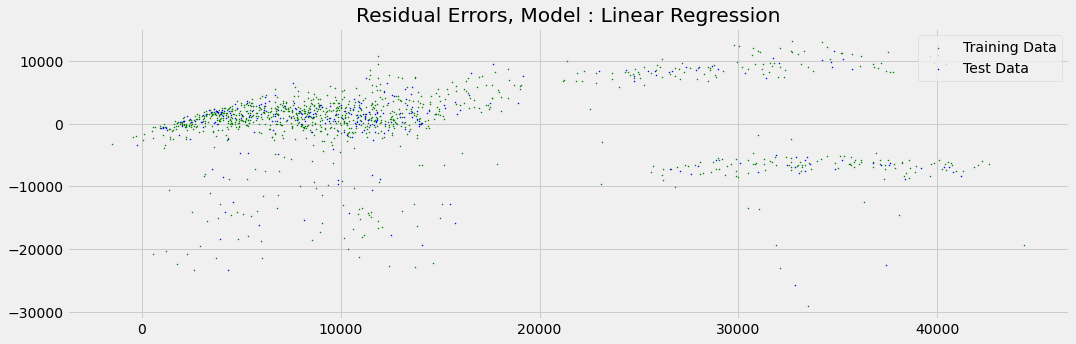

In [319]:
# Plotting for residual error.
# Setting plot style.
plt.style.use('fivethirtyeight')
  
# Plotting residual errors in training data.
plt.scatter(linear_reg.predict(X_train), linear_reg.predict(X_train) - y_train,
            color = "green", s = 1, label = 'Training Data')
  
# Plotting residual errors in test data.
plt.scatter(linear_reg.predict(X_test), linear_reg.predict(X_test) - y_test,
            color = "blue", s = 1, label = 'Test Data')
  
# Plotting line for zero residual error.
plt.hlines(y = 0, xmin = 0, xmax = 5, linewidth = 2)
  
# Plotting the legend.
plt.legend(loc = 'upper right')
  
# Plot the title.
plt.title("Residual Errors, Model : Linear Regression")
  
# Method call for displaying the plot.
plt.show()

## 2. Random Forest

In [320]:
# Creating a Random Forest object.
random_for = RandomForestRegressor()

# Training the Linear Regression model using the Training Data.
random_for.fit(X_train,y_train)

RandomForestRegressor()

In [321]:
# Comparing the predicted values to the actual values on Test Data.
test_pred_rf = random_for.predict(X_test)
test_pred_rf_comparison = pd.DataFrame({"Predicted":test_pred_rf,"Actual":y_test})
test_pred_rf_comparison

,Predicted,Actual
559,3232.011733,1646.42970
1087,12518.052971,11353.22760
1020,11346.070608,8798.59300
460,9676.232262,10381.47870
802,5466.293887,2103.08000
...,...,...
682,43802.220952,40103.89000
629,46102.641049,42983.45850
893,46248.892339,44202.65360
807,2720.720010,2136.88225


In [322]:
# Comparing the predicted values to the actual values on Training Data.
train_pred_rf = random_for.predict(X_train)
train_pred_rf_comparison = pd.DataFrame({"Predicted":train_pred_rf,"Actual":y_train})
#train_pred_rf_comparison

In [323]:
# Evaluating the model for accuracy on Test Data.
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_test, test_pred_rf))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_test, test_pred_rf))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
r2_rf_test = format(random_for.score(X_test, y_test))
print("\nVariance Score for the Random Forest Model : ",r2_rf_test)


Mean Absolute Error :  3004.4548752119395

Mean Squared Error :  24595043.061960388

Root Mean Squared Error :  4959.338974294899

Variance Score for the Random Forest Model :  0.8352429147799074


In [324]:
# Evaluating the model for accuracy on Training Data to identify overfitting (if any.)
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_train, train_pred_rf))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_train, train_pred_rf))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_train, train_pred_rf)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
r2_rf_train = format(random_for.score(X_train, y_train))
print("\nVariance Score for the Random Forest Model : ",r2_rf_train)


Mean Absolute Error :  1067.1189205792145

Mean Squared Error :  3539522.58251797

Root Mean Squared Error :  1881.3618956803525

Variance Score for the Random Forest Model :  0.9757315828649057


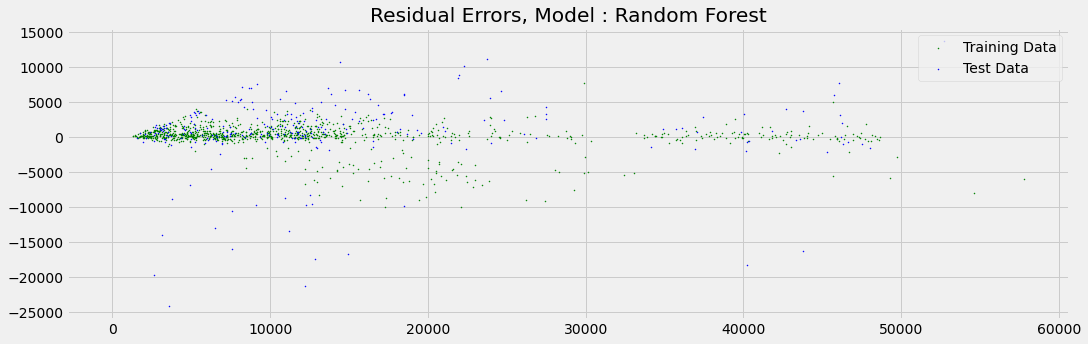

In [325]:
# Plotting for residual error.
# Setting plot style.
plt.style.use('fivethirtyeight')
  
# Plotting residual errors in training data.
plt.scatter(random_for.predict(X_train), random_for.predict(X_train) - y_train,
            color = "green", s = 1, label = 'Training Data')
  
# Plotting residual errors in test data.
plt.scatter(random_for.predict(X_test), random_for.predict(X_test) - y_test,
            color = "blue", s = 1, label = 'Test Data')
  
# Plotting line for zero residual error.
plt.hlines(y = 0, xmin = 0, xmax = 5, linewidth = 2)
  
# Plotting the legend.
plt.legend(loc = 'upper right')
  
# Plot the title.
plt.title("Residual Errors, Model : Random Forest")
  
# Method call for displaying the plot.
plt.show()

## 3. Support Vector Machine

In [326]:
# Creating a Support Vector Machine object.
svm = SVR()

# Training the Support Vector Machine using the Training Data.
svm.fit(X_train,y_train)

SVR()

In [327]:
# Comparing the predicted values to the actual values on Test Data.
test_pred_svm = svm.predict(X_test)
test_pred_svm_comparison = pd.DataFrame({"Predicted":test_pred_svm,"Actual":y_test})
test_pred_svm_comparison

,Predicted,Actual
559,9377.280450,1646.42970
1087,9377.257365,11353.22760
1020,9361.993156,8798.59300
460,9377.246878,10381.47870
802,9165.084649,2103.08000
...,...,...
682,9377.274672,40103.89000
629,9377.244970,42983.45850
893,9377.277521,44202.65360
807,9377.303758,2136.88225


In [328]:
# Comparing the predicted values to the actual values on Training Data.
train_pred_svm = svm.predict(X_train)
train_pred_svm_comparison = pd.DataFrame({"Predicted":train_pred_svm,"Actual":y_train})
#train_pred_svm_comparison

In [329]:
# Evaluating the model for accuracy on Test Data.
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_test, test_pred_svm))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_test, test_pred_svm))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, test_pred_svm)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
svm_r2_test = format(svm.score(X_test, y_test))
print("\nVariance Score for the SVM Model : ", svm_r2_test)


Mean Absolute Error :  8292.719232941981

Mean Squared Error :  165588640.15746588

Root Mean Squared Error :  12868.124966655627

Variance Score for the SVM Model :  -0.10924390858652555


In [330]:
# Evaluating the model for accuracy on Training Data.
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_train, train_pred_svm))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_train, train_pred_svm))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_train, train_pred_svm)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
svm_r2_train = format(svm.score(X_train, y_train))
print("\nVariance Score for the SVM Model : ", svm_r2_train)


Mean Absolute Error :  8332.812663005543

Mean Squared Error :  160645737.4302956

Root Mean Squared Error :  12674.609951801103

Variance Score for the SVM Model :  -0.10145299995792745


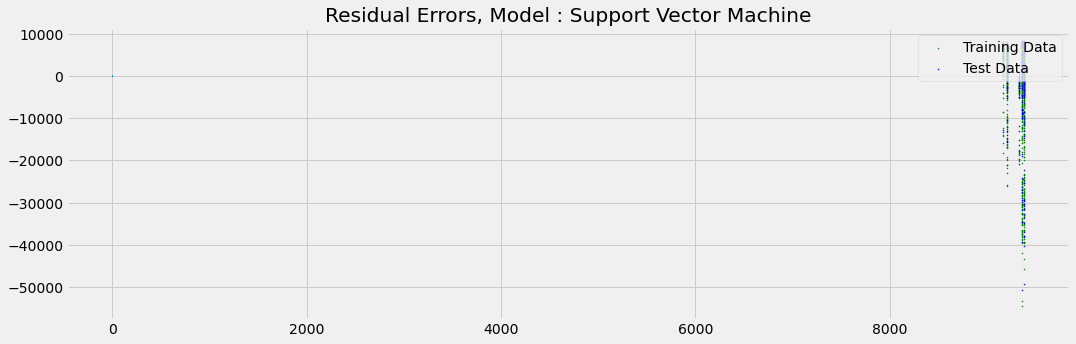

In [331]:
# Plotting for residual error.
# Setting plot style.
plt.style.use('fivethirtyeight')
  
# Plotting residual errors in training data.
plt.scatter(svm.predict(X_train), svm.predict(X_train) - y_train,
            color = "green", s = 1, label = 'Training Data')
  
# Plotting residual errors in test data.
plt.scatter(svm.predict(X_test), svm.predict(X_test) - y_test,
            color = "blue", s = 1, label = 'Test Data')
  
# Plotting line for zero residual error.
plt.hlines(y = 0, xmin = 0, xmax = 5, linewidth = 2)
  
# Plotting the legend.
plt.legend(loc = 'upper right')
  
# Plot the title.
plt.title("Residual Errors, Model : Support Vector Machine")
  
# Method call for displaying the plot.
plt.show()

## 4. XG Gradient Boost

In [332]:
# Creating a Gradient Boost object.
gr = GradientBoostingRegressor()

# Training the XG Gradient Boost using the Training Data.
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [333]:
X_train.shape

(1070, 4)

In [334]:
# Comparing the predicted values to the actual values on Test Data.
test_pred_gr = gr.predict(X_test)
test_pred_gr_comparison = pd.DataFrame({"Predicted":test_pred_gr,"Actual":y_test})
test_pred_gr_comparison

,Predicted,Actual
559,3612.718475,1646.42970
1087,12983.225790,11353.22760
1020,11102.033513,8798.59300
460,11301.404305,10381.47870
802,5726.863461,2103.08000
...,...,...
682,40769.285348,40103.89000
629,44633.647535,42983.45850
893,44122.362088,44202.65360
807,3772.077914,2136.88225


In [335]:
# Comparing the predicted values to the actual values on Training Data.
train_pred_gr = gr.predict(X_train)
train_pred_gr_comparison = pd.DataFrame({"Predicted":train_pred_gr,"Actual":y_train})
#train_pred_gr_comparison

In [336]:
# Evaluating the model for accuracy on Test Data.
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_test, test_pred_gr))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_test, test_pred_gr))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, test_pred_gr)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
gr_r2_test = format(gr.score(X_test, y_test))
print("\nVariance Score for the XG Gradient Boost Model : ",gr_r2_test)


Mean Absolute Error :  2575.433875004012

Mean Squared Error :  20464911.697358068

Root Mean Squared Error :  4523.816054765939

Variance Score for the XG Gradient Boost Model :  0.8629098069863456


In [337]:
# Evaluating the model for accuracy on Training Data.
print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_train, train_pred_gr))
print("\nMean Squared Error : ", metrics.mean_squared_error(y_train, train_pred_gr))
print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_train, train_pred_gr)))

#Evaluating the variance score. (Note: score = 1 means perfect prediction.)
gr_r2_train = format(gr.score(X_train, y_train))
print("\nVariance Score for the XG Gradient Boost Model : ", gr_r2_train)


Mean Absolute Error :  2159.720001187096

Mean Squared Error :  14881858.397710074

Root Mean Squared Error :  3857.701180458392

Variance Score for the XG Gradient Boost Model :  0.8979638810259799


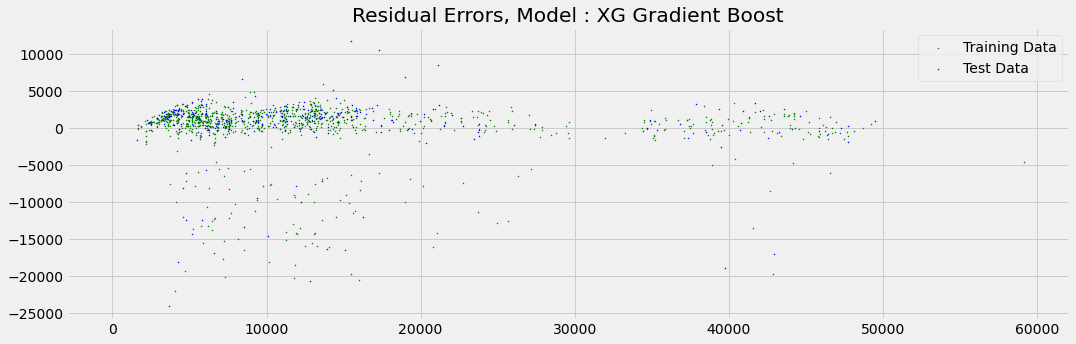

In [338]:
# Plotting for residual error.
# Setting plot style.
plt.style.use('fivethirtyeight')
  
# Plotting residual errors in training data.
plt.scatter(gr.predict(X_train), gr.predict(X_train) - y_train,
            color = "green", s = 1, label = 'Training Data')
  
# Plotting residual errors in test data.
plt.scatter(gr.predict(X_test), gr.predict(X_test) - y_test,
            color = "blue", s = 1, label = 'Test Data')
  
# Plotting line for zero residual error.
plt.hlines(y = 0, xmin = 0, xmax = 5, linewidth = 2)
  
# Plotting the legend.
plt.legend(loc = 'upper right')
  
# Plot the title.
plt.title("Residual Errors, Model : XG Gradient Boost")
  
# Method call for displaying the plot.
plt.show()

# Section-4.a : Model Evaluation (Health Insurance Charges Prediction)

In [339]:
# Evaluating the model performance by comparing the MAE, MSE, RMSE Value on Test Data for the various models implemented.


df_Metric = pd.DataFrame({"Models":['Linear Regression', 'Random Forest', 'Support Vector Machine', 'XG Gradient Boost'],
                          
                        "Mean Absolute Error":[metrics.mean_absolute_error(y_test, test_pred_lr),
                                               metrics.mean_absolute_error(y_test, test_pred_rf),
                                               metrics.mean_absolute_error(y_test, test_pred_svm),
                                               metrics.mean_absolute_error(y_test, test_pred_gr)],                   
                        "Mean Squared Error":[metrics.mean_squared_error(y_test, test_pred_lr),
                                              metrics.mean_squared_error(y_test, test_pred_rf),
                                              metrics.mean_squared_error(y_test, test_pred_svm),
                                              metrics.mean_squared_error(y_test, test_pred_gr)],
                          
                        "Root Mean Squared Error":[np.sqrt(metrics.mean_squared_error(y_test, test_pred_lr)),
                                                   np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf)),
                                                   np.sqrt(metrics.mean_squared_error(y_test, test_pred_svm)),
                                                   np.sqrt(metrics.mean_squared_error(y_test, test_pred_gr))]})


df_Metric

,Models,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,3989.443579,3.441685e+07,5866.587676
1,Random Forest,3004.454875,2.459504e+07,4959.338974
2,Support Vector Machine,8292.719233,1.655886e+08,12868.124967
3,XG Gradient Boost,2575.433875,2.046491e+07,4523.816055


In [340]:
# Evaluating the model performance by comparing the R2 Value on Test Data and Training Data, for the various models implemented.
df_R2 = pd.DataFrame({"Models":['Linear Regression', 'Random Forest', 'Support Vector Machine', 'XG Gradient Boost'],
                        "R-Square : Test Data":[r2_lr_test,r2_rf_test,svm_r2_test,gr_r2_test],
                        "R-Square : Training Data":[r2_lr_train,r2_rf_train,svm_r2_train,gr_r2_train],
                        "Delta R-Square (|Test-Train|)":[abs(float(r2_lr_test)-float(r2_lr_train)),abs(float(r2_rf_test)-float(r2_rf_train)),abs(float(svm_r2_test)-float(svm_r2_train)),abs(float(gr_r2_test)-float(gr_r2_train))]
                     })
df_R2

,Models,R-Square : Test Data,R-Square : Training Data,Delta R-Square (|Test-Train|)
0,Linear Regression,0.7694486636353987,0.7545391474616814,0.014910
1,Random Forest,0.8352429147799074,0.9757315828649057,0.140489
2,Support Vector Machine,-0.10924390858652555,-0.10145299995792745,0.007791
3,XG Gradient Boost,0.8629098069863456,0.8979638810259799,0.035054


In [341]:
# Plotting the R2 Value on Test Data and Training Data, to make a visual inference.
df_R2['Test Data'] = pd.to_numeric(df_R2['Test Data'])
df_R2['Training Data'] = pd.to_numeric(df_R2['Training Data'])
plt.rcParams['figure.figsize'] = (16,5)
plt.title('R2 Value on Test Data and Training Data')
plt.xlabel('Models Implemented') 
plt.ylabel('R2 Value') 
plt.plot(df_R2['Models'], df_R2['Test Data'] , color = 'blue', label = 'Test Data') # Test Data Set 
plt.plot(df_R2['Models'], df_R2['Training Data'] , color = 'green', label = 'Train Data') # Train Data Set
plt.legend(loc = "center right")

KeyError: 'Test Data'

In [ ]:
# Summary of prediction on Test Data.
df_summary = pd.DataFrame({'Actual':y_test,'Linear Regression':test_pred_lr, 'Random Forest':test_pred_rf,
                           'Support Vector Machine':test_pred_svm, 'XG Gradient Boost':test_pred_gr})
df_summary.head()

# Predicting the Insurance Charges for a New Customer using the best model - XG Gradient Boost

In [ ]:
# Predicting the Insurance Charges for a New Customer.
data_new = {'age' : 27, 'bmi' : 22, 'steps' : 9855, 'smoker' : 0}
df_new = pd.DataFrame(data_new,index=[0])
df_new

In [ ]:
new_pred = gr.predict(df_new)
print("\nThe Insurance Charges for the new customer is : $", new_pred[0])

# Graphical User Interface : Health Insurance Charges Predictor

In [ ]:
import joblib
joblib.dump(gr, "model_joblib_gr")
model = joblib.load("model_joblib_gr")
model.predict(data_trunc)

In [ ]:
from tkinter import *
import joblib

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
        
    model = joblib.load("model_joblib_gr")
    result = model.predict([[p1, p2, p3, p4]])
    
    Label(master, text = "Insurance Charges").grid(row = 7)
    Label(master, text = result).grid(row = 8)

master = Tk()
master.title("Insurance Charges Predictor")
label = Label(master, text = "Enter your details below:", bg = "grey", fg = "white").grid(row = 0, columnspan = 2)

Label(master, text = "Age").grid(row = 1)
Label(master, text = "BMI").grid(row = 2)
Label(master, text = "Number of Steps").grid(row = 3)
Label(master, text = "Smoker/Non-Smoker - 0/1").grid(row = 4)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)

e1.grid(row = 1, column = 1)
e2.grid(row = 2, column = 1)
e3.grid(row = 3, column = 1)
e4.grid(row = 4, column = 1)

Button(master, text = "Calculate", command = show_entry).grid()
mainloop()

# Section-3.b : Model Building (Health Insurance Claims Chances Prediction)

# Partitioning the Data.

In [ ]:
# Set up the dependent and the independent variables by dropping the Target Variable from the data frame.

# The independent variables that are being used for model builiding are : 
# 1. age
# 2. bmi
# 3. steps
# 4. smoker_yes 
# 5. charges

# The target variable is : insuranceclaim

# X = Independent Variables/Feature Matrix
# y = Taget Variable/Response Vector

X = data.drop(['sex', 'children', 'region', 'insuranceclaim'],axis=1)
y = data['insuranceclaim']

In [ ]:
# Making a copy of the attribute truncated complete dataset.
data_trunc_2 = X
data_trunc_2.head()

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Splitting the data : X and y into Training Data and Test Data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# Having a glance at the shape of the Training Data and the Test Data.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Model Implementation

#### 1. XG Gradient Boost
#### 2. Random Forest

## 1. XG Gradient Boost

In [ ]:
# Creating a Gradient Boost object.
gr2 = GradientBoostingClassifier()

# Training the XG Gradient Boost using the Training Data.
gr2.fit(X_train,y_train)

In [ ]:
# Comparing the predicted values to the actual values on Test Data.
test_pred_gr = gr2.predict(X_test)
test_pred_gr_comparison = pd.DataFrame({"Predicted":test_pred_gr,"Actual":y_test})
test_pred_gr_comparison

In [ ]:
# Evaluating the model for accuracy on Test Data.
from sklearn.metrics import accuracy_score
accuracy_gr1 = accuracy_score(y_test, test_pred_gr)
print("\nAccuracy Score : %.2f%%" % (accuracy_gr1 * 100.0))

In [ ]:
# Assessing the Confusion Matrix & Classification Report for the model performance on Test Data.
from sklearn.metrics import classification_report,confusion_matrix
cm_gr1 = confusion_matrix(y_test, test_pred_gr)
cr_gr1 = classification_report(y_test , test_pred_gr)
print("\nConfusion Matrix : \n\n", cm_gr1)
print("\n\nClassification Report : \n\n", cr_gr1)

In [ ]:
# Plotting the Confusion Matrix to analyse the model performance on Test Data.
group_names =['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_gr1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_gr1.flatten()/np.sum(cm_gr1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gr1, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Comparing the predicted values to the actual values on Training Data.
train_pred_gr = gr2.predict(X_train)
train_pred_gr_comparison = pd.DataFrame({"Predicted":train_pred_gr,"Actual":y_train})
train_pred_gr_comparison

In [ ]:
# Evaluating the model for accuracy on Training Data.
accuracy_gr2 = accuracy_score(y_train, train_pred_gr)
print("\nAccuracy Score : %.2f%%" % (accuracy_gr2 * 100.0))

In [ ]:
# Assessing the Confusion Matrix & Classification Report for the model performance on Training Data.
from sklearn.metrics import classification_report,confusion_matrix
cm_gr2 = confusion_matrix(y_train, train_pred_gr)
cr_gr2 = classification_report(y_train , train_pred_gr)
print("\nConfusion Matrix : \n\n", cm_gr2)
print("\n\nClassification Report : \n\n", cr_gr2)

In [ ]:
# Plotting the Confusion Matrix to analyse the model performance on Training Data.
group_names =['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_gr2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_gr2.flatten()/np.sum(cm_gr2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gr2, annot=labels, fmt='', cmap='Blues')

## 2. Random Forest

In [ ]:
# Creating a Random Forest object.
random_for2 = RandomForestClassifier()

# Training the Linear Regression model using the Training Data.
random_for2.fit(X_train,y_train)

In [ ]:
# Comparing the predicted values to the actual values on Test Data.
test_pred_rf = random_for2.predict(X_test)
test_pred_rf_comparison = pd.DataFrame({"Predicted":test_pred_rf,"Actual":y_test})
test_pred_rf_comparison

In [ ]:
# Evaluating the model for accuracy on Test Data.
from sklearn.metrics import accuracy_score
accuracy_rf1 = accuracy_score(y_test, test_pred_rf)
print("\nAccuracy Score : %.2f%%" % (accuracy_rf1 * 100.0))

In [ ]:
# Assessing the Confusion Matrix & Classification Report for the model performance on Test Data.
from sklearn.metrics import classification_report,confusion_matrix
cm_rf1 = confusion_matrix(y_test, test_pred_rf)
cr_rf1 = classification_report(y_test , test_pred_rf)
print("\nConfusion Matrix : \n\n", cm_rf1)
print("\n\nClassification Report : \n\n", cr_rf1)

In [ ]:
# Plotting the Confusion Matrix to analyse the model performance on Test Data.
group_names =['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf1.flatten()/np.sum(cm_rf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf1, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Comparing the predicted values to the actual values on Training Data.
train_pred_rf = random_for2.predict(X_train)
train_pred_rf_comparison = pd.DataFrame({"Predicted":train_pred_rf,"Actual":y_train})
train_pred_rf_comparison

In [ ]:
# Evaluating the model for accuracy on Training Data.
accuracy_rf2 = accuracy_score(y_train, train_pred_rf)
print("\nAccuracy Score : %.2f%%" % (accuracy_rf2 * 100.0))

In [ ]:
# Assessing the Confusion Matrix & Classification Report for the model performance on Training Data.
from sklearn.metrics import classification_report,confusion_matrix
cm_rf2 = confusion_matrix(y_train, train_pred_rf)
cr_rf2 = classification_report(y_train , train_pred_rf)
print("\nConfusion Matrix : \n\n", cm_rf2)
print("\n\nClassification Report : \n\n", cr_rf2)

In [ ]:
# Plotting the Confusion Matrix to analyse the model performance on Training Data.
group_names =['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf2.flatten()/np.sum(cm_rf2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf2, annot=labels, fmt='', cmap='Blues')

# Section-4.b : Model Evaluation (Health Insurance Claims Chances Prediction)

In [ ]:
# Evaluating the model performance by comparing the R2 Value on Test Data and Training Data, for the various models implemented.
from sklearn.metrics import precision_recall_fscore_support as score
precision_gr1,recall_gr1,fscore_gr1,support_gr1=score(y_test , test_pred_gr, average='macro')
precision_gr2,recall_gr2,fscore_gr2,support_gr2=score(y_train , train_pred_gr, average='macro')
precision_rf1,recall_rf1,fscore_rf1,support_rf1=score(y_test , test_pred_rf, average='macro')
precision_rf2,recall_rf2,fscore_rf2,support_rf2=score(y_train , train_pred_rf, average='macro')

df_R2 = pd.DataFrame({"Models":['XG Gradient Boost', 'Random Forest'],
                        "Accuracy on Test Data":[accuracy_gr1, accuracy_rf1],
                        "Accuracy on Training Data":[accuracy_gr2, accuracy_rf2],
                        "Delta Accuracy (|Test-Train|)":[abs(accuracy_gr1-accuracy_gr2),abs(accuracy_rf1-accuracy_rf2)],
                        "Precision on Test Data":[precision_gr1, precision_rf1],
                        "Precision on Training Data":[precision_gr2, precision_rf2],
                        "Recall on Test Data":[recall_gr1, recall_rf1],
                        "Recall on Training Data":[recall_gr2, recall_rf2],
                        "f1-score on Test Data":[fscore_gr1, fscore_rf1],
                        "f1-score on Training Data":[fscore_gr2, fscore_rf2]})
df_R2

# Predicting the Insurance Claim Chances for a New Customer using the best model - XG Gradient Boost

In [ ]:
# Predicting the Insurance Claim for a New Customer.
data_new = {'age' : 67, 'bmi' : 28, 'steps' : 1855, 'smoker' : 1, 'charges' : 37554}
df_new = pd.DataFrame(data_new,index=[0])
df_new

In [ ]:
new_pred = gr2.predict(df_new)
print("\nThe chances of Insurance Claim for the new customer is : ", new_pred[0])

# Graphical User Interface : Health Insurance Claim Chances Predictor

In [ ]:
import joblib
joblib.dump(gr2, "model_joblib_gr")
model = joblib.load("model_joblib_gr")
model.predict(data_trunc_2)

In [ ]:
from tkinter import *
import joblib

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    
    model = joblib.load("model_joblib_gr")
    result = model.predict([[p1, p2, p3, p4, p5]])
    
    Label(master, text = "Insurance Claim Chances").grid(row = 7)
    Label(master, text = result).grid(row = 8)

master = Tk()
master.title("Insurance Claim Predictor")
label = Label(master, text = "Enter your details below:", bg = "grey", fg = "white").grid(row = 0, columnspan = 2)

Label(master, text = "Age").grid(row = 1)
Label(master, text = "BMI").grid(row = 2)
Label(master, text = "Number of Steps").grid(row = 3)
Label(master, text = "Smoker/Non-Smoker - 0/1").grid(row = 4)
Label(master, text = "Insurance Charges").grid(row = 5)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row = 1, column = 1)
e2.grid(row = 2, column = 1)
e3.grid(row = 3, column = 1)
e4.grid(row = 4, column = 1)
e5.grid(row = 5, column = 1)


Button(master, text = "Calculate", command = show_entry).grid()
mainloop()

### End of code